In [1]:
%cd /scratch/bruingjde/SNAM2021-code/

from constants import *

/scratch/bruingjde/SNAM2021-code


In [4]:
def logistic_regression_III_hypergraph(
  network: int, heuristic: str, time_strategy: str):
  
  X = dict()  
  for aggregation_strategy in aggregation_strategies:
    if aggregation_strategy not in ['m2', 'm3']:
      X[aggregation_strategy] = np.load(
        f'data/{network:02}/features/time_edge/'
        f'{heuristic}_{time_strategy}_{aggregation_strategy}.npy')
    
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000))
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1])
  
  return auc

def logistic_regression_III_simplegraph(
  network: int, heuristic: str, time_strategy: str):
  
  X = dict()  
  X[heuristic] = np.load(
    f'data/{network:02}/features/time_edge/{heuristic}_{time_strategy}.npy')
    
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000))
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1])
  
  return auc

exp3 = [
  {
    'heuristic': heuristic,
    'time strategy': time_strategy,
    'network': network_index,
    'score': (
      logistic_regression_III_hypergraph(network_index, heuristic, time_strategy) 
      if network_index in hypergraph_indices else 
      logistic_regression_III_simplegraph(network_index, heuristic, time_strategy))
  }
  for heuristic in heuristics
  for time_strategy in time_strategies
  for network_index in network_indices
]

In [44]:
df = pd.DataFrame(exp3)
df = df.groupby(['heuristic', 'time strategy'])['score'].mean()
df = df.unstack()
df = df.round(3)
df.index = df.index.set_names('')
df.columns = df.columns.set_names('')

In [45]:
print(
  df.to_latex(
    caption=(
    'Performance, measured by the AUC, for the various heuristics and time '
    'strategies.'),
    label='fig:time-strategies')
)

\begin{table}
\centering
\caption{Performance, measured by the AUC, for the various heuristics and time strategies.}
\label{fig:time-strategies}
\begin{tabular}{lrrr}
\toprule
{} &    exp &    lin &   sqrt \\
   &        &        &        \\
\midrule
aa &  0.824 &  0.820 &  0.817 \\
cn &  0.811 &  0.804 &  0.801 \\
jc &  0.682 &  0.681 &  0.682 \\
pa &  0.788 &  0.779 &  0.777 \\
\bottomrule
\end{tabular}
\end{table}



<AxesSubplot:xlabel='time strategy', ylabel='heuristic'>

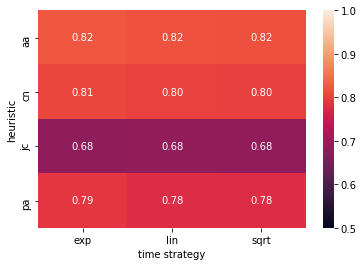

In [33]:
sns.heatmap(
  pd.DataFrame(exp3).groupby(['heuristic', 'time strategy'])['score'].mean().unstack(),
  vmin=.5, vmax=1, annot=True, fmt='.2f'
)